# Russian Corpora Study

In [1]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

from os import listdir
from os.path import isfile, join

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.text' in sys.modules:
    del sys.modules['pygents.text']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.token' in sys.modules:
    del sys.modules['pygents.token']

from pygents.util import * 
from pygents.text import * 
from pygents.plot import * 
from pygents.token import * 


In [2]:
# https://nlpub.ru/%D0%A0%D0%B5%D1%81%D1%83%D1%80%D1%81%D1%8B - Inventory

# http://study.mokoron.com/ - Twitter, need to extract froom SQL
# https://linguatools.org/tools/corpora/wikipedia-monolingual-corpora/ - Wiki, need to extract from XML


In [3]:
# RusAge
# https://www.kaggle.com/datasets/oldaandozerskaya/fiction-corpus-for-agebased-text-classification - just txt books

path = '../../nlp/corpora/Russian/rusage/archive/previews'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
print(len(onlyfiles))
onlyfiles


5498


['children_2126.txt',
 'adults_1489.txt',
 'adults_2180.txt',
 'children_1349.txt',
 'children_319.txt',
 'adults_389.txt',
 'adults_2194.txt',
 'children_2132.txt',
 'children_1413.txt',
 'children_457.txt',
 'children_331.txt',
 'children_1375.txt',
 'adults_2802.txt',
 'children_1361.txt',
 'adults_2816.txt',
 'children_325.txt',
 'children_443.txt',
 'children_1407.txt',
 'adults_2143.txt',
 'adults_438.txt',
 'adults_2625.txt',
 'adults_2631.txt',
 'adults_1338.txt',
 'adults_2157.txt',
 'adults_1476.txt',
 'children_494.txt',
 'adults_362.txt',
 'adults_404.txt',
 'adults_2619.txt',
 'adults_1310.txt',
 'adults_1304.txt',
 'adults_410.txt',
 'adults_376.txt',
 'adults_1462.txt',
 'children_480.txt',
 'children_2442.txt',
 'adults_821.txt',
 'adults_2382.txt',
 'children_669.txt',
 'adults_1853.txt',
 'children_2324.txt',
 'adults_1847.txt',
 'children_2330.txt',
 'children_1639.txt',
 'adults_2396.txt',
 'adults_835.txt',
 'children_2456.txt',
 'children_1177.txt',
 'children_133

In [4]:
#check if context is present
n_counters1 = context_save_load(None,'russian_rusage',folder='data/models/')
len(n_counters1)


7

In [5]:
if n_counters1 is None or len(n_counters1) < 1:
    max_n = 7 # https://www.sciencedirect.com/science/article/abs/pii/0378375886901692
    n_counters1 = grams_init(max_n)
    cnt = 0
    for file in onlyfiles:
        with open(join(path, file),errors='ignore') as f:
            lines = f.readlines()
            cnt += 1
            print(cnt,file)
            for text in lines:
                text = preprocess_text(text)
                text_grams_count(n_counters1,text,max_n)
    context_save_load(n_counters1,'russian_rusage',folder='data/models/')


In [6]:
dfs = []
for i in range(len(n_counters1)):
    counter = n_counters1[i]
    df = pd.DataFrame([(gram, counter[gram]) for gram in counter],columns=['gram','freq'])
    df['log'] = np.log10(df['freq'])
    df.sort_values('freq',ascending=False,inplace=True)
    df.title = str(1+i)
    dfs.append(df)

/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


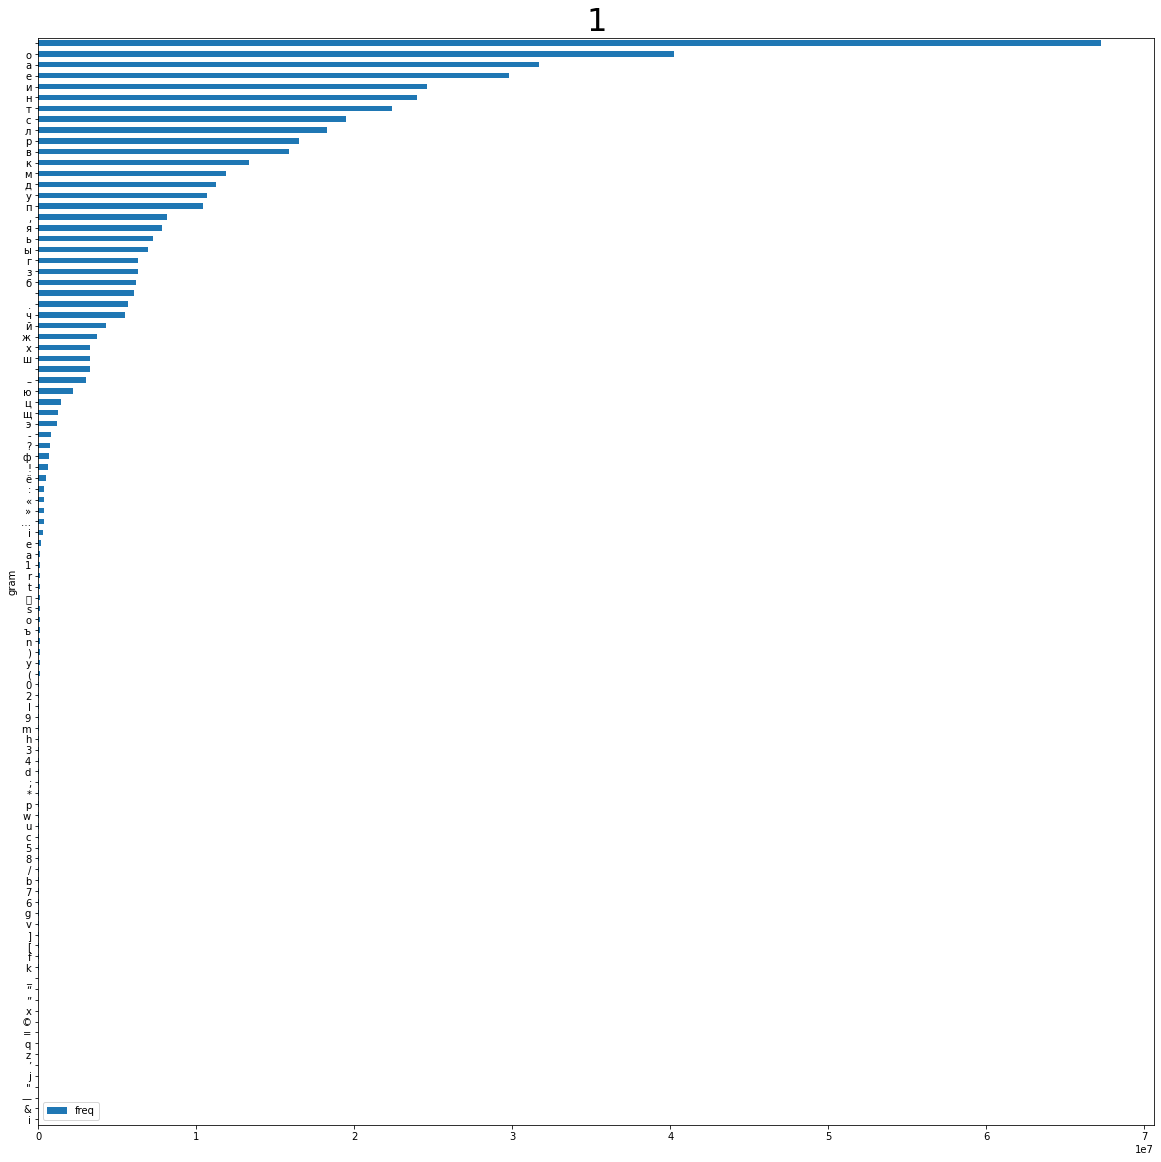

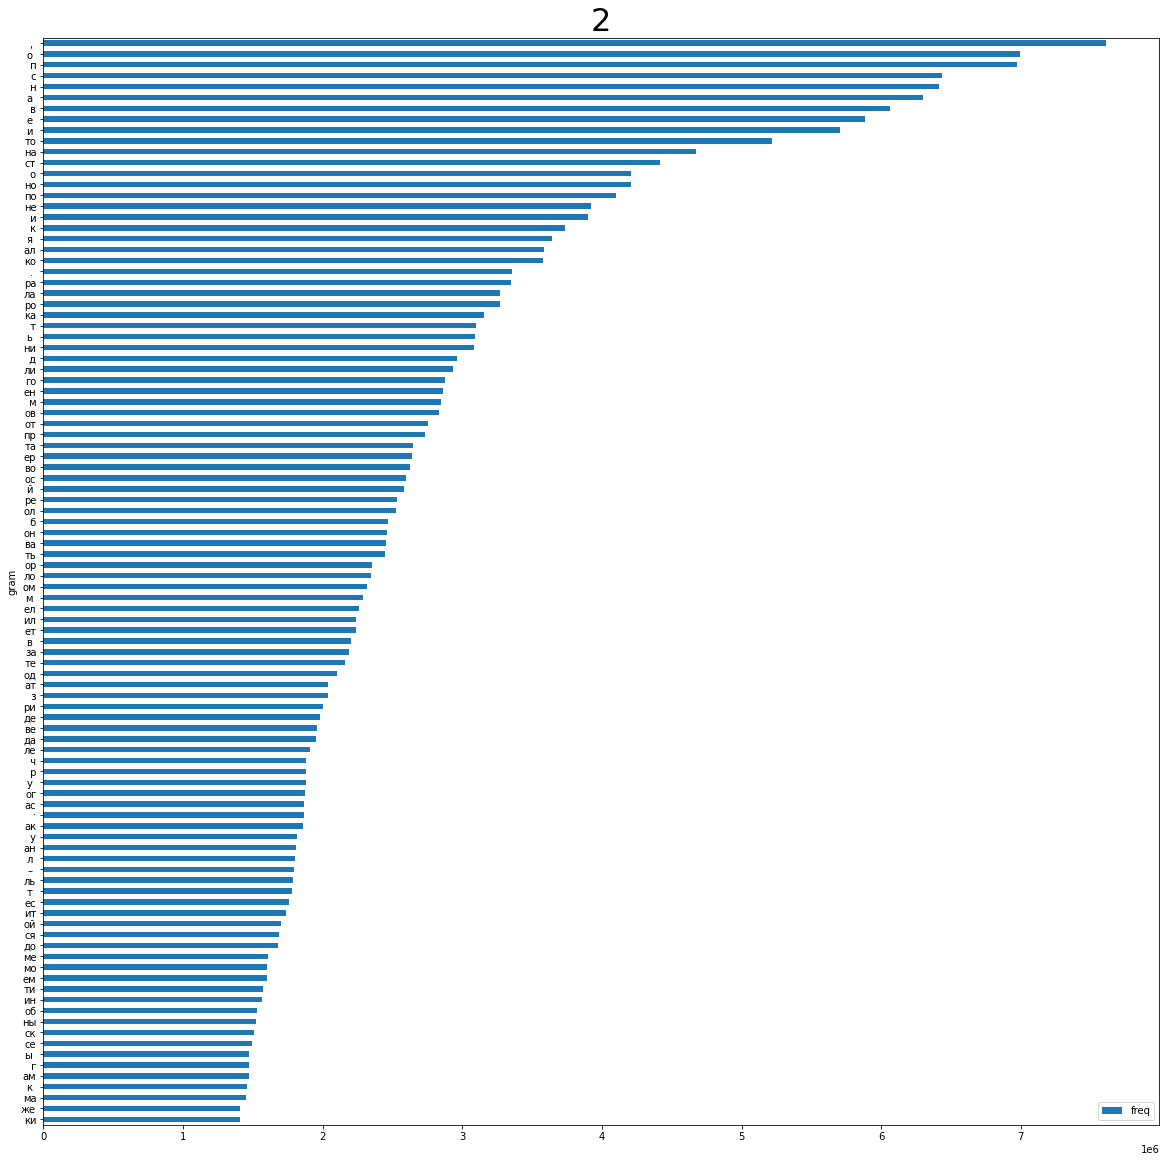

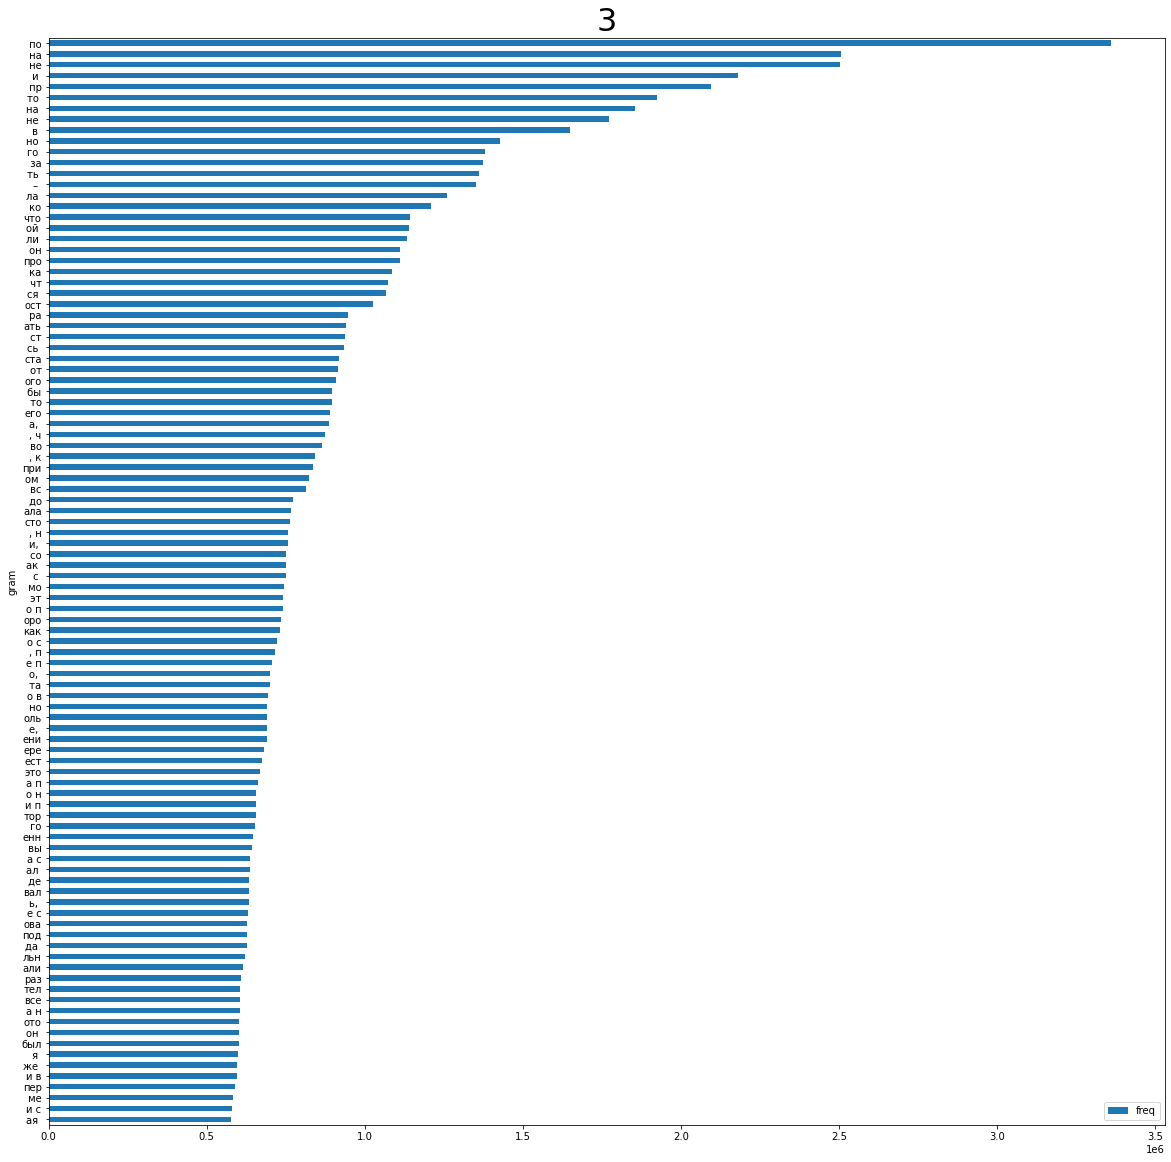

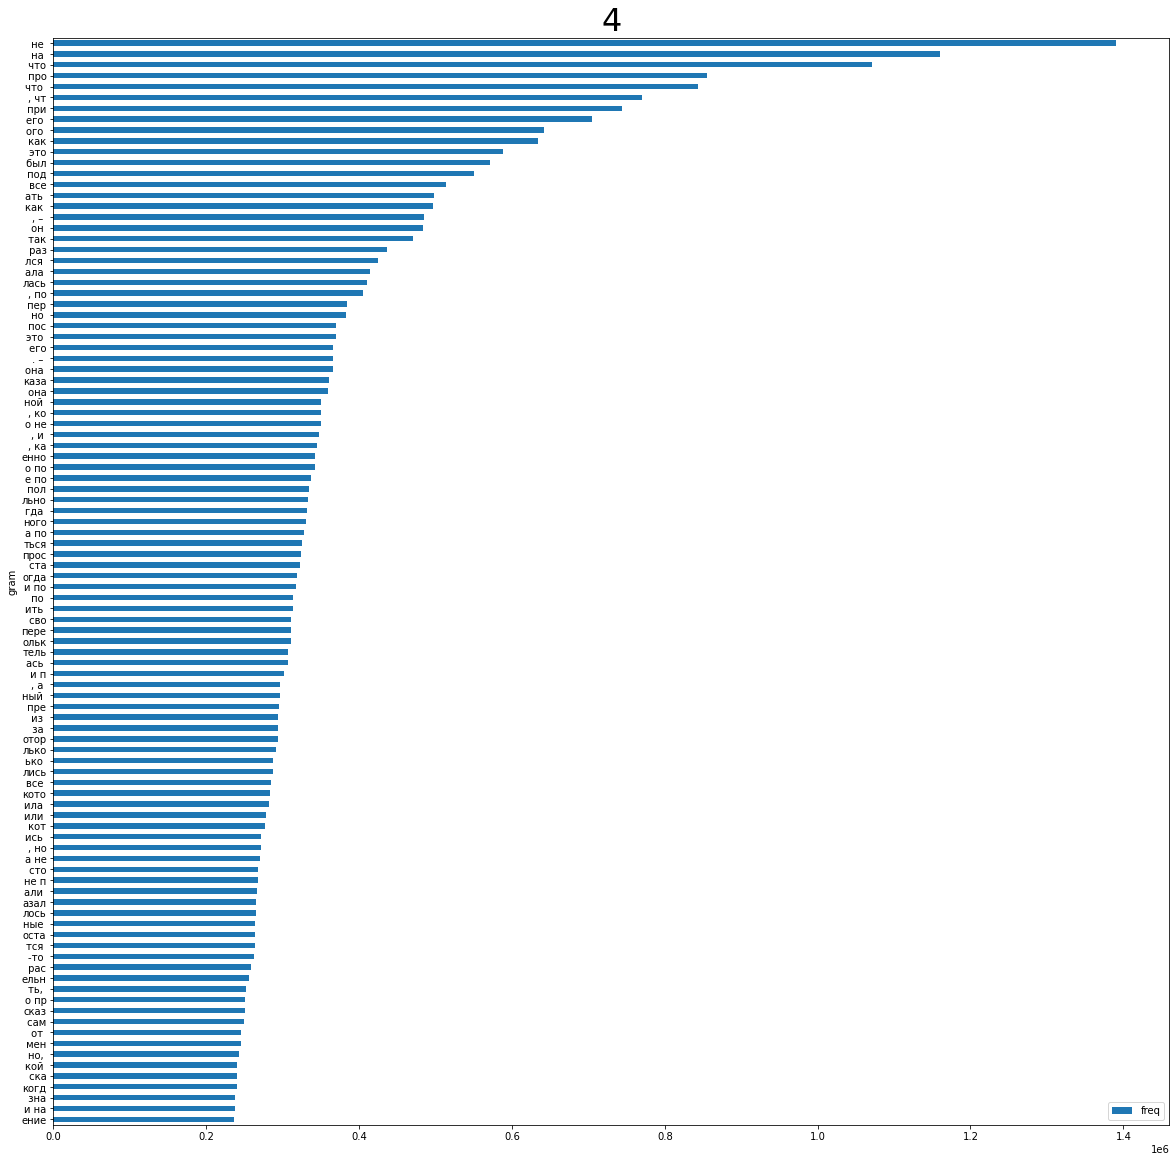

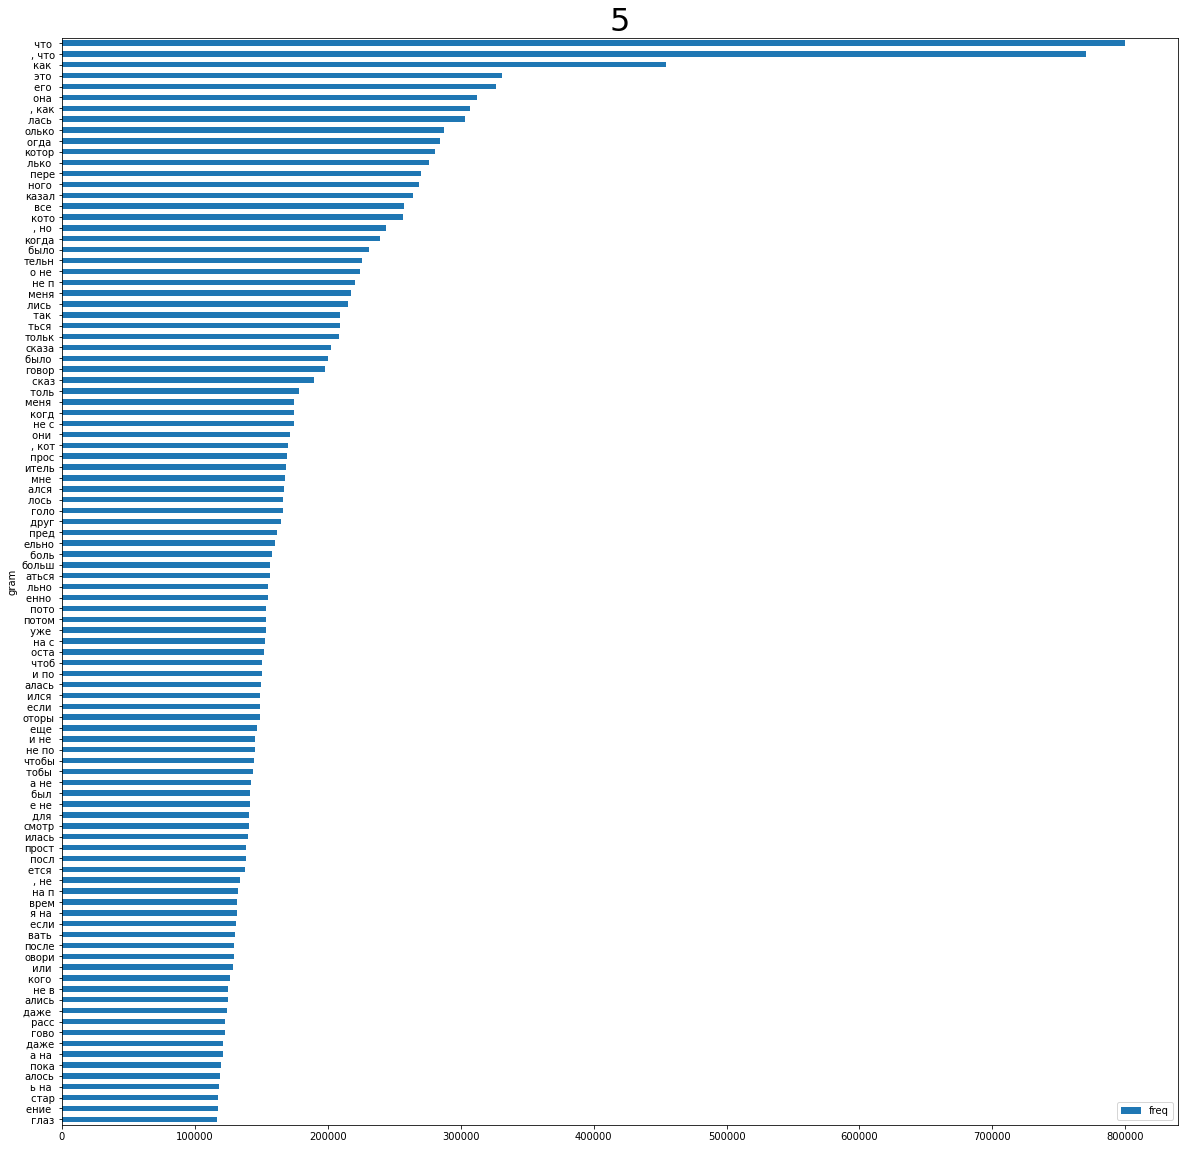

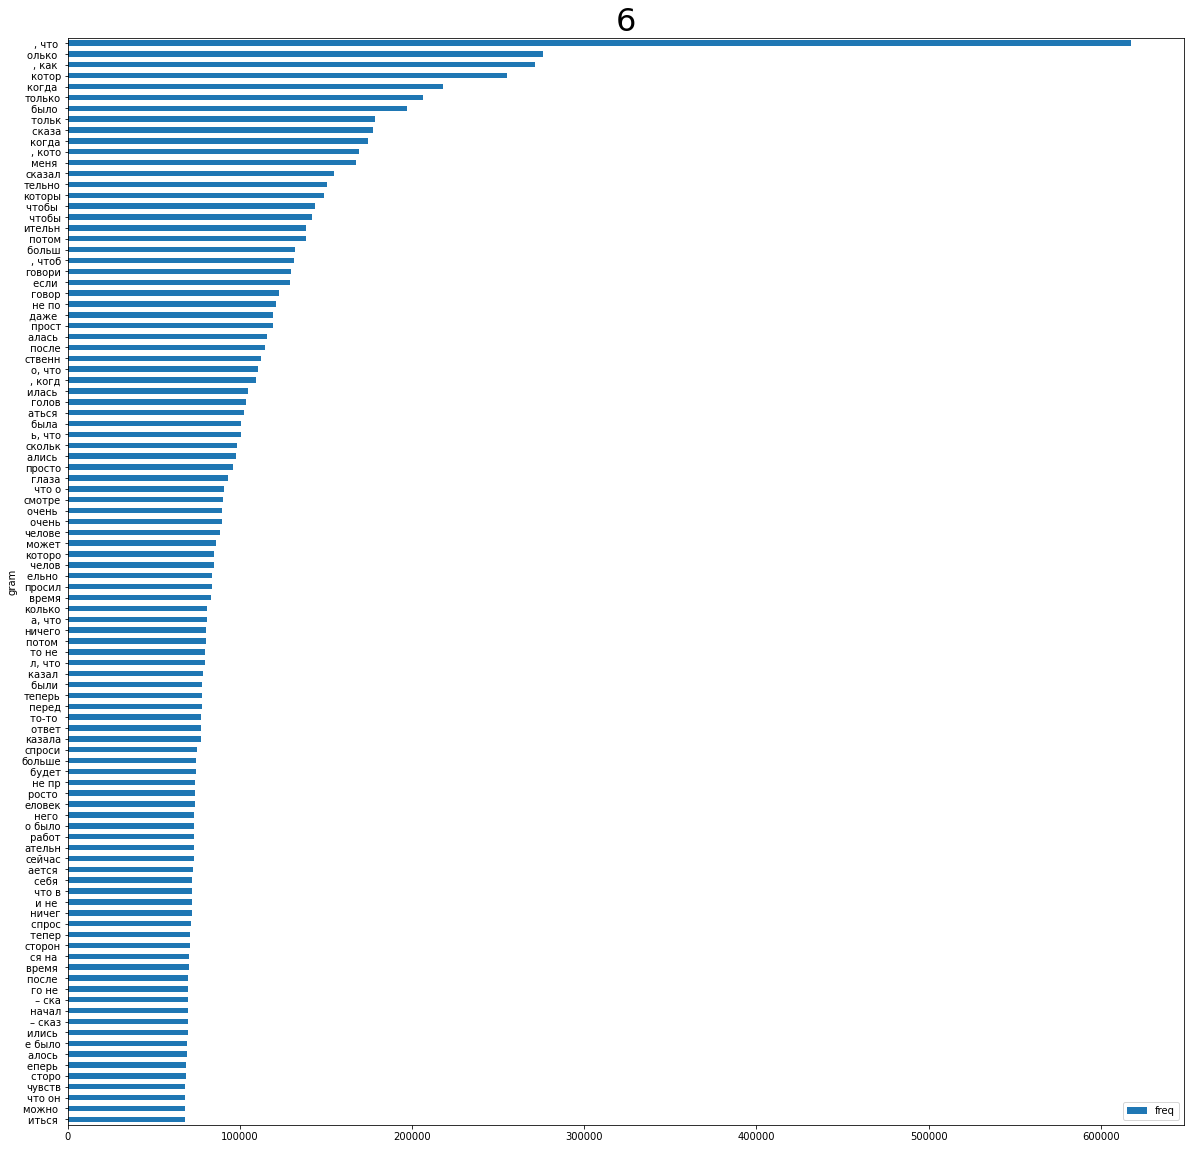

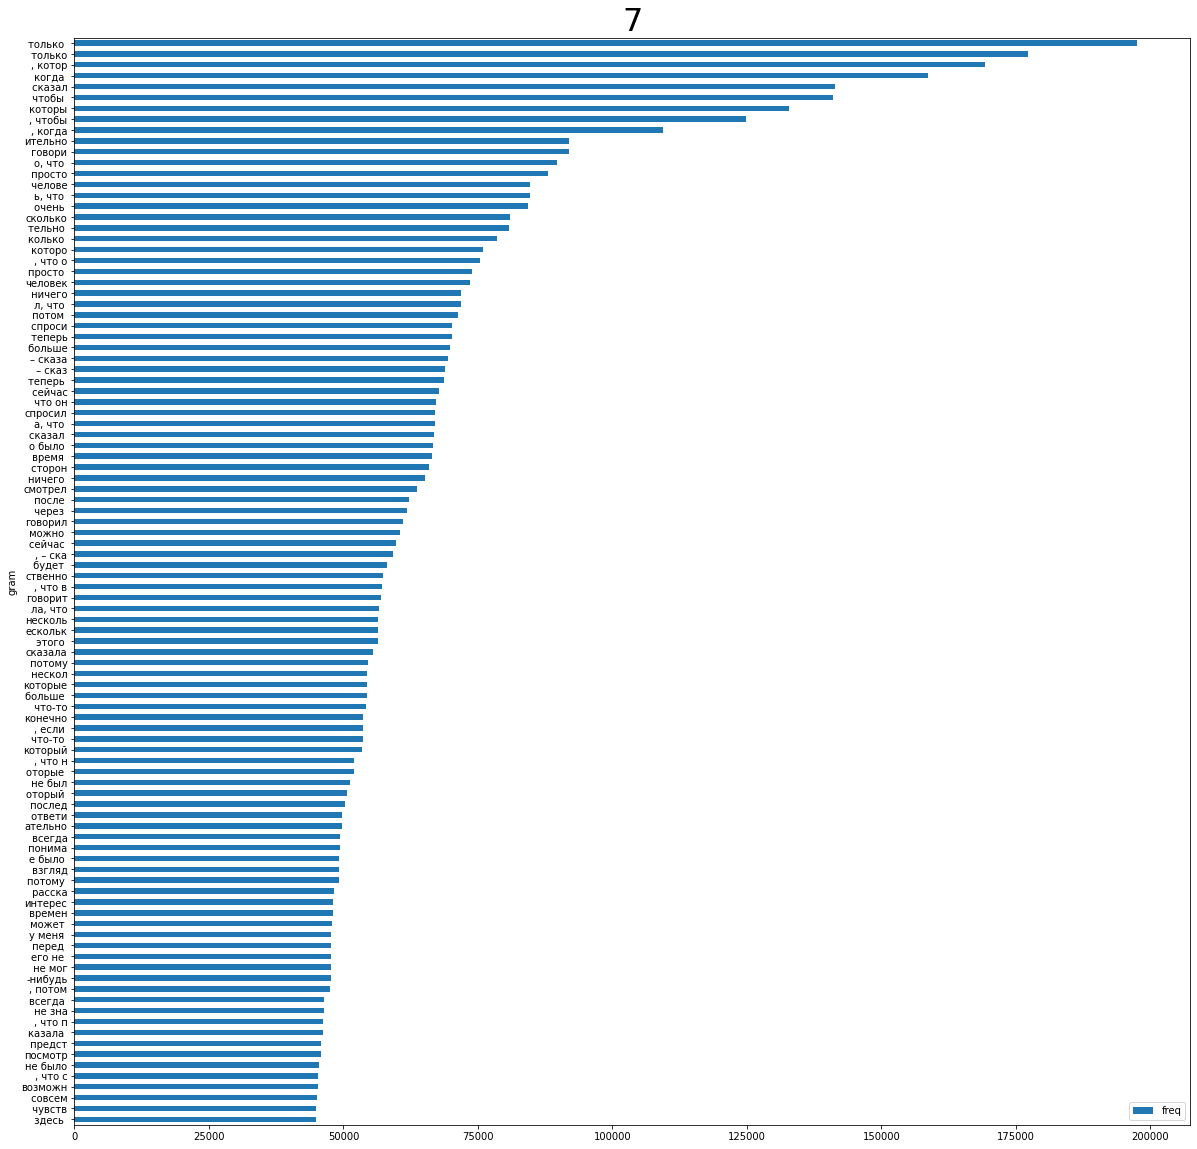

In [7]:
plt.rcParams["figure.figsize"] = (20,20)
for df in dfs:
    p = df[:100][['gram','freq']].plot.barh(x='gram'); p.invert_yaxis();
    p.set_title(df.title,fontsize = 32)
    plt.show()

## Load and explore full models

In [ ]:
rusage_chars = FreedomTokenizer(max_n=7,mode='chars',debug=False)
rusage_grams = FreedomTokenizer(max_n=7,mode='grams',debug=False)

path = '../../nlp/corpora/Russian/rusage/archive/previews'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
cnt = 0
for file in onlyfiles:
    with open(join(path, file),errors='ignore') as f:
        lines = f.readlines()
        cnt += 1
        if (cnt % 100) == 0:
            print(cnt,file)
        rusage_chars.train(lines)
        rusage_grams.train(lines)

rusage_chars.store('data/models/rusage_chars_7a')
rusage_grams.store('data/models/rusage_grams_7a')
                
print(rusage_chars.count_params())
print(rusage_grams.count_params())


100 children_2522.txt
200 children_2053.txt
